<a href="https://colab.research.google.com/github/ravellys/PID/blob/master/Lista3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade \#3
---
## Universidade Federal de Pernambuco - Departamento de Energia Nuclear
## Processamento de Imagens Digitais
### Aluno - Lucas Ravellys
---

In [ ]:
# Importando bibliotecas
import skimage as sk
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os
from matplotlib import image

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1.

##1.a
Salve a fatia 110 do arquivo head256.sgi e a amplie para que tenha aresta de 512 pixels 

In [ ]:
dir =  'drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 3/Images'
file_img = 'head256.sgi'


f = open(os.path.join(dir,file_img),'rb') # Abrir arquivo para ler
img_arr=np.fromfile(f,dtype=np.uint8) # importar arquivo
img_arr=img_arr[12:].reshape(-1,256,256) # reorganizar formato do arquivo
img_arr.shape # formato do arquivo

(225, 256, 256)

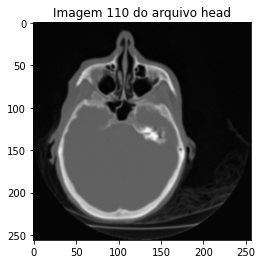

In [ ]:
# mostrar imagem 110 do arquivo head
img_110 = img_arr[110]
plt.imshow(img_110,cmap = 'gray')
plt.title("Imagem 110 do arquivo head")
plt.show()

#salvar imagem
name = 'head256_fatia110.jpg'
image.imsave(os.path.join(dir,name), img_110)

In [ ]:
# Transforma a imagem com 512 px
import skimage.transform as transform
img_512 = transform.rescale(img_110,512/256, preserve_range = True).astype(np.int)

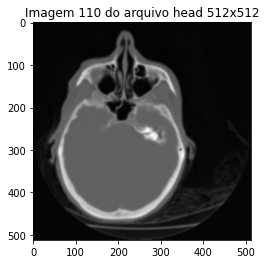

In [ ]:
# mostrar imagem 110 do arquivo head com largura e altura de 512px
plt.imshow(img_512,cmap = 'gray')
plt.title("Imagem 110 do arquivo head 512x512")
plt.show()

#salvar imagem
name = 'head256_fatia110_rescale512.jpg'
image.imsave(os.path.join(dir,name), img_512)

## 1.b 
 Faça seu histograma para obter visualmente um tom de cinza limiar que separe osso de tecido mole (no arquivo Atividade3.docx a ser entregue, salve a imagem do histograma e desenhe sobre a mesma uma linha indicando o limiar escolhido). Então, faça a segmentação da imagem usando este tom de cinza.

In [ ]:
limiar = 109
img_segmentada = img_512 > limiar

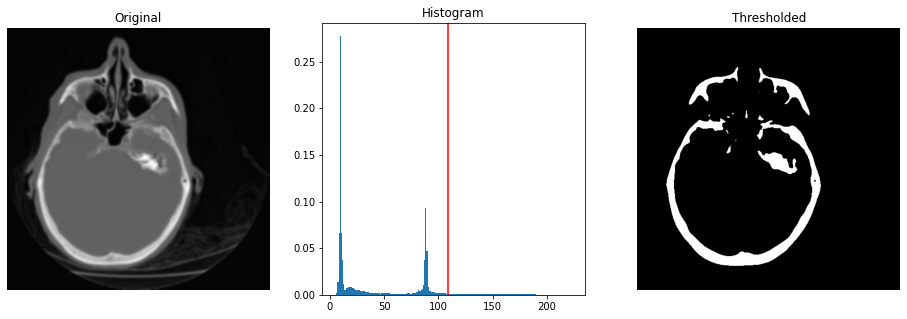

In [ ]:
def Plot_im_segmentada(im, im_segmentada, limiar):
# Plotagem antes e depois da segmentação 
  fig, axes = plt.subplots(ncols=3, figsize=(16, 5))
  ax = axes.ravel()
  ax[0] = plt.subplot(1, 3, 1)
  ax[1] = plt.subplot(1, 3, 2)
  ax[2] = plt.subplot(1, 3, 3, sharex=ax[0], sharey=ax[0])

  ax[0].imshow(im, cmap='gray')
  ax[0].set_title('Original')
  ax[0].axis('off')

  ax[1].hist(im.ravel(), bins=(im.max()-im.min()),range = (im.min(), im.max()), density = True)
  ax[1].set_title('Histogram')
  ax[1].axvline(limiar, color='r')

  ax[2].imshow(im_segmentada, cmap='gray')
  ax[2].set_title('Thresholded')
  ax[2].axis('off')

  plt.show()

Plot_im_segmentada(img_512,img_segmentada, limiar)  

##1.c) 
Realize a segmentação da mesma imagem com base em um percentual do tom de cinza máximo (para avaliar o percentual use o histograma e a contagem de pixels em uma imagem monocromática).

Pela distribuição do histograma da figura abaixo pode-se notar dois picos.


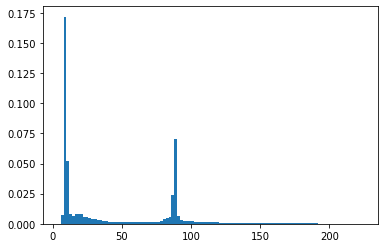

In [ ]:
bins_hist = np.array(plt.hist(img_512.ravel(),bins=int((img_512.max()-img_512.min())/2),range = (img_512.min(), img_512.max()), density = True))


In [ ]:
max_1 = np.sort(bins_hist[0])[-1]
max_2 = np.sort(bins_hist[0])[-2]

print("o maior pico é - ", max_1)
print("o segundo maior pico é - ", max_2)

o maior pico é -  0.17175674438476562
o segundo maior pico é -  0.06997299194335938


nesse problema iremos utilizar o segundo maior pico para determinar o limiar de segmentação

In [ ]:
pos_max2 = np.where(bins_hist[0] == max_2)[0]

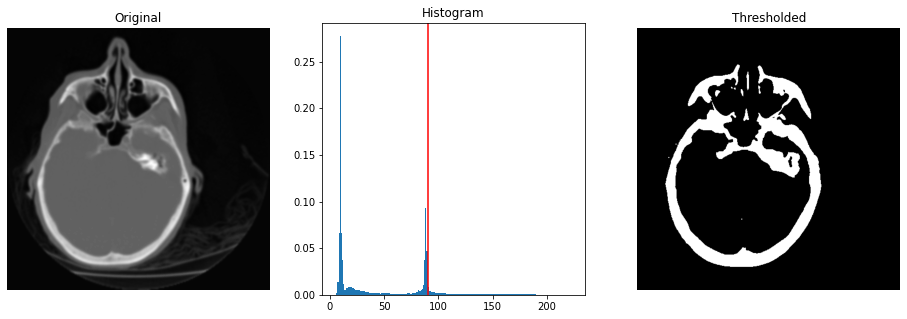

In [ ]:
limiar = bins_hist[1][pos_max2+1]
img_segmentada_max = img_512 > limiar
Plot_im_segmentada(img_512,img_segmentada_max, limiar)  

In [ ]:
print("o percentual de amostra escolhido do histograma foi de: {}%".format(bins_hist[0][int(pos_max2+1):].sum()*100))

o percentual de amostra escolhido do histograma foi de: 5.896186828613281%


##1.d) 
Centralize as duas imagens segmentadas.



In [ ]:
# centroide da amostra
def center (im):
  dimx, dimy = img_segmentada.shape
  Mx, My = 0, 0

  im = img_segmentada.astype(int)
  for i in range(dimx):
    for j in range(dimy):
      Mx = Mx + i*im[i,j]
      My = My + j*im[i,j] 

  xm = Mx/(im.sum())
  ym = My/(im.sum())
  return xm, ym

In [ ]:
# deslocamento 
def desloc_im(im, xm,ym):

  dimx, dimy = im.shape
  dx = int(xm - dimx/2)
  dy = int(ym - dimy/2)

  im_desloc = np.zeros(im.shape)
  for i in range(dimx):
    for j in range(dimy):
      im_desloc[j,i] = im[j+dy,i+dx]

  return im_desloc

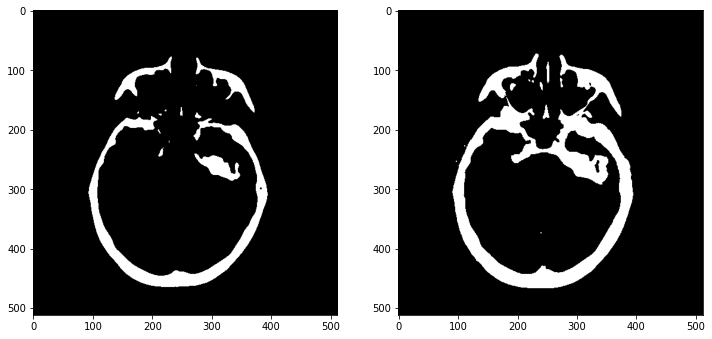

In [ ]:
xm = 220
ym = 256

img_segmentada_desloc = desloc_im(img_segmentada, xm,ym)
img_segmentada_max_desloc = desloc_im(img_segmentada_max, xm,ym)


fig, axes = plt.subplots(ncols = 2,figsize=(12,6))
ax = axes.ravel()
ax[0].imshow(img_segmentada_desloc,"gray")
ax[1].imshow(img_segmentada_max_desloc,"gray")
plt.show()


## 1.e) 
Calcule o erro relativo entre os dois processos de segmentação. 




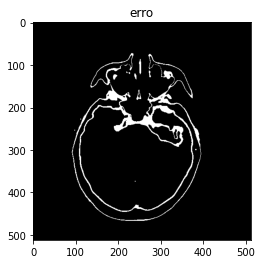

In [ ]:
im_erro = np.abs(img_segmentada_desloc.astype(int)-img_segmentada_max_desloc.astype(int))
plt.imshow(im_erro,"gray")
plt.title("erro")
plt.show()

In [ ]:
print("o erro relativo médio foi de - ", im_erro.sum()/len(im_erro.ravel()))

o erro relativo médio foi de -  0.042690277099609375


##1.f)
Ilustre esta questão com imagens, gráficos e texto, justificando cada procedimento. Descreva como funcionam estas duas técnicas de segmentação e em que situações utilizá-las apropriadamente.


1. Foi possível utilizar a segmentação manual selecionando o tom de cinza. 
2. Com essa técnica foi possível separar a região de tecido ósseo e tecido mole.
3. A técnica utilizando o limiar do pico de Tom de cinza mostrou-se bastante eficiente em comparação a técnica manual, com a grande vantagem de ser possível de ser realizada de modo automático.

#2.

Utilize o arquivo KRB_Femur.sgi, um cubo de aresta 128 com imagens micro-CT de uma amostra da região trabecular do fêmur de um adulto, e obtenha, de modo apropriado, um volume de fatias para os seguintes tipos de segmentação limiar SGI: Usando a média dos tons de cinza, a mediana e a moda.

Faça uma análise comparativa dos resultados e ilustre com imagens 3D suas explicações.

In [ ]:
# import file
dir =  'drive/My Drive/Classroom/Processamento de Imagens Digitais/Lista 3/Images'
file_img = 'KRB_Femur.sgi'

f = open(os.path.join(dir,file_img),'rb') # Abrir arquivo para ler
img_arr=np.fromfile(f,dtype=np.uint8) # importar arquivo
print(img_arr.shape)
img_arr=img_arr[12:].reshape(-1,128,128) # reorganizar formato do arquivo
img_arr.shape # formato do arquivo

(2097164,)


(128, 128, 128)

In [ ]:
import statistics

media = np.mean(img_arr.ravel())
print( ' Média - ', media)

mediana = np.median(img_arr.ravel())
print( ' Mediana - ', mediana)

moda = statistics.mode(img_arr.ravel())
print( ' Moda - ', moda)

 Média -  18.314495086669922
 Mediana -  14.0
 Moda -  5


In [ ]:
im_seg_media = img_arr > media
im_seg_mediana = img_arr > mediana
im_seg_moda = img_arr > moda

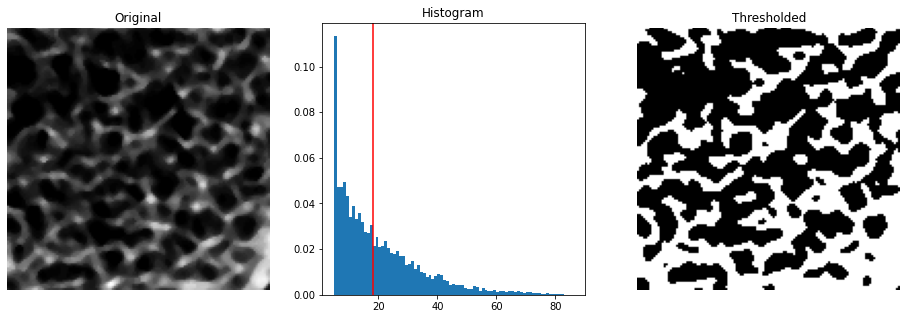

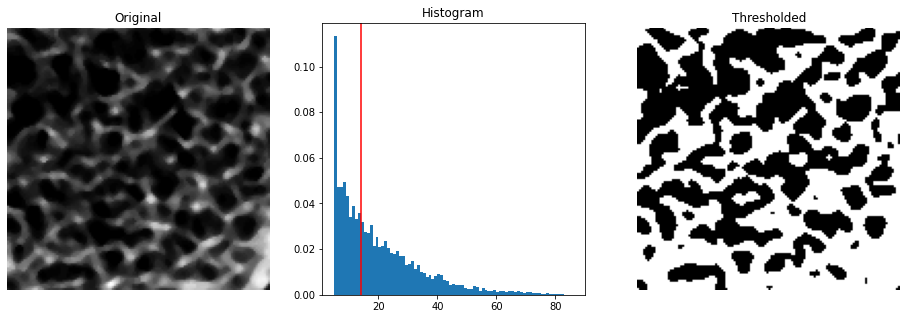

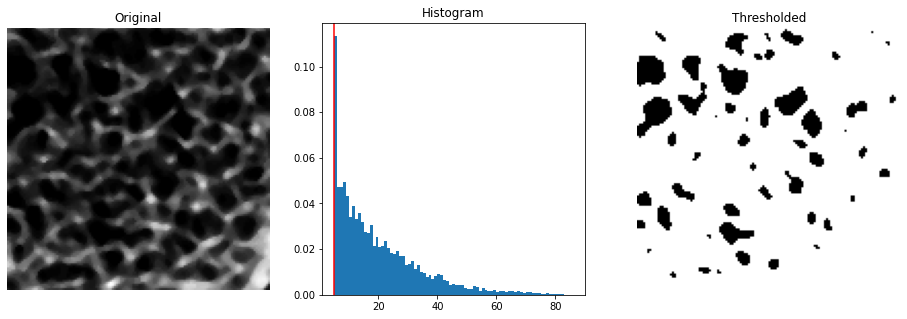

In [ ]:
pos = 50
Plot_im_segmentada(img_arr[110],im_seg_media[110], media)  
Plot_im_segmentada(img_arr[110],im_seg_mediana[110], mediana)  
Plot_im_segmentada(img_arr[110],im_seg_moda[110], moda)  

In [ ]:
%%capture
!pip install porespy 
import porespy as ps 

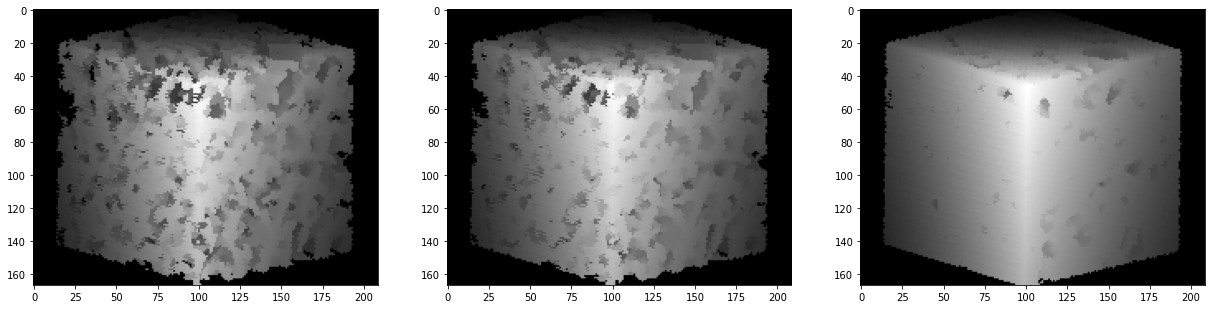

In [ ]:
fig, axes = plt.subplots(ncols = 3, figsize = (21,7))
ax = axes.ravel()
ax[0].imshow(ps.visualization.show_3D(im_seg_media == False), cmap = 'gray');
ax[1].imshow(ps.visualization.show_3D(im_seg_mediana == False), cmap = 'gray');
ax[2].imshow(ps.visualization.show_3D(im_seg_moda == False), cmap = 'gray');

In [ ]:
import pandas as pd

voxel_True_media = im_seg_media.sum()/len(im_seg_media.ravel())
voxel_True_mediana = im_seg_mediana.sum()/len(im_seg_media.ravel())
voxel_True_moda = im_seg_moda.sum()/len(im_seg_media.ravel())



df = pd.DataFrame([[media, mediana, moda],[voxel_True_media, voxel_True_mediana, voxel_True_moda]],
                  columns=["media","mediana","moda"], 
                  index = ["Limiar","Voxel positivo"])
df.head()

,media,mediana,moda
Limiar,18.314495,14.000000,5.000000
Voxel positivo,0.386746,0.494215,0.843477


1. A segmentação com a Moda divergiu muito da segmentação com a média e a mediana.
2. Sendo assim, é importante ter uma medida experimental da porosidade do Femur para determinar qual método reprenta melhor esse meio poroso. 